In [1]:
# Модул који садржи податке и функције потребне за рад са амино киселинама
from podaci import *

C:\Users\ajakovljevic\.conda\envs\jupyterlab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ajakovljevic\.conda\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ajakovljevic\.conda\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Библиотека која омогућавају увид у информације о живим објектима током изврашавања
# Приказ тренутне верзије методе класе
# Дефинисање нове методе класе
# Дефинисанње нових атрибута класе
# Замена и додавање метода класи

<h1 align='center'> Увод </h1>

<h1 align='center'> Протеини </h1>

In [3]:
class Peptid:
    
    def __init__(self, peptid):
        """
        Пептид је представљен ниском амино киселина у стринговној једнословној репрезентацији.
        """
        self.peptid = peptid
    
    def __str__(self):
        # Репрезентација пептида када се користи print функција
        return self.peptid
    
    def __repr__(self):
        # Репрезентација пептида када се користи display функција
        return self.peptid
        
    def __add__(self, peptid):
        # Спајање ниске амино киселина два пептида, креирајући нови пептид
        return Peptid(str(self.peptid) + str(peptid))

<h1 align='center'> Протеомика </h1>

<h2 align='center'> Масени спектрометри </h2> 

Због ограничења опсега вредности које масени спектрометри могу да детектују, често је потребно поделити протеине на више полипептидних ланаца мање масе, што се постиже активношћу ензима протеазе, која у организмима има улогу разградње протеина. Један пример таквог ензима који се често користи је трипсин који врши поделу протеина на пептиде који се састоје од просечно четрнаест амино киселина и који настају прекидима након амино киселина арганина (А) и лизина (К). Коришћењем других и различитих врста протеазе добија се на разноврсности фрагмената.

<img src="../slike/aktivnost-proteaze.drawio.png" style="float:center" width="400"/>

На самом улазу у масени спектрометар, овако настали пептиди пролазе кроз процес јонизације. Корак јонизације производи негативно и позитивно наелектрисане јоне делова пептида, који у наредним компонентама масеног спектрометра могу бити опажени коришћењем њиховог наелектрисања. На начин фрагментације пептида различити извори јона различито утичу, па тако извори јаче енергије, такозване грубе методе, производе велики број фрагмената, док насупрот њих меке методе настоје да очувају пептиде целима. Неке врсте масених спектрометара користе меке методе јонизације, а додају одвојену компоненту фрагментације како би осигурали да ће бити генерисан довољан број података на основу којих се може реконструисати пептид. Начин на који се генеришу фрагменти се разликује чак и за исте пептиде. Са одређеном вероватноћом одређене везе се лакше раскидају, међутим шаблон поделе никада није исти, и већина копија пептида ће произвести међусобно различите фрагментне јоне. 

In [4]:
class MaseniSpektar:
    # Спектар добијен као производ масеног спектрометра
    
    def __init__(self, spektar):
        # Спектар је представљен сортираном листом целобројних маса
        self.spektar = sorted(set([0] + spektar))
        self.roditeljska_masa = max(spektar)        
    
    def __str__(self):
        return "[" + ", ".join([str(x) for x in self.spektar]) + "]"

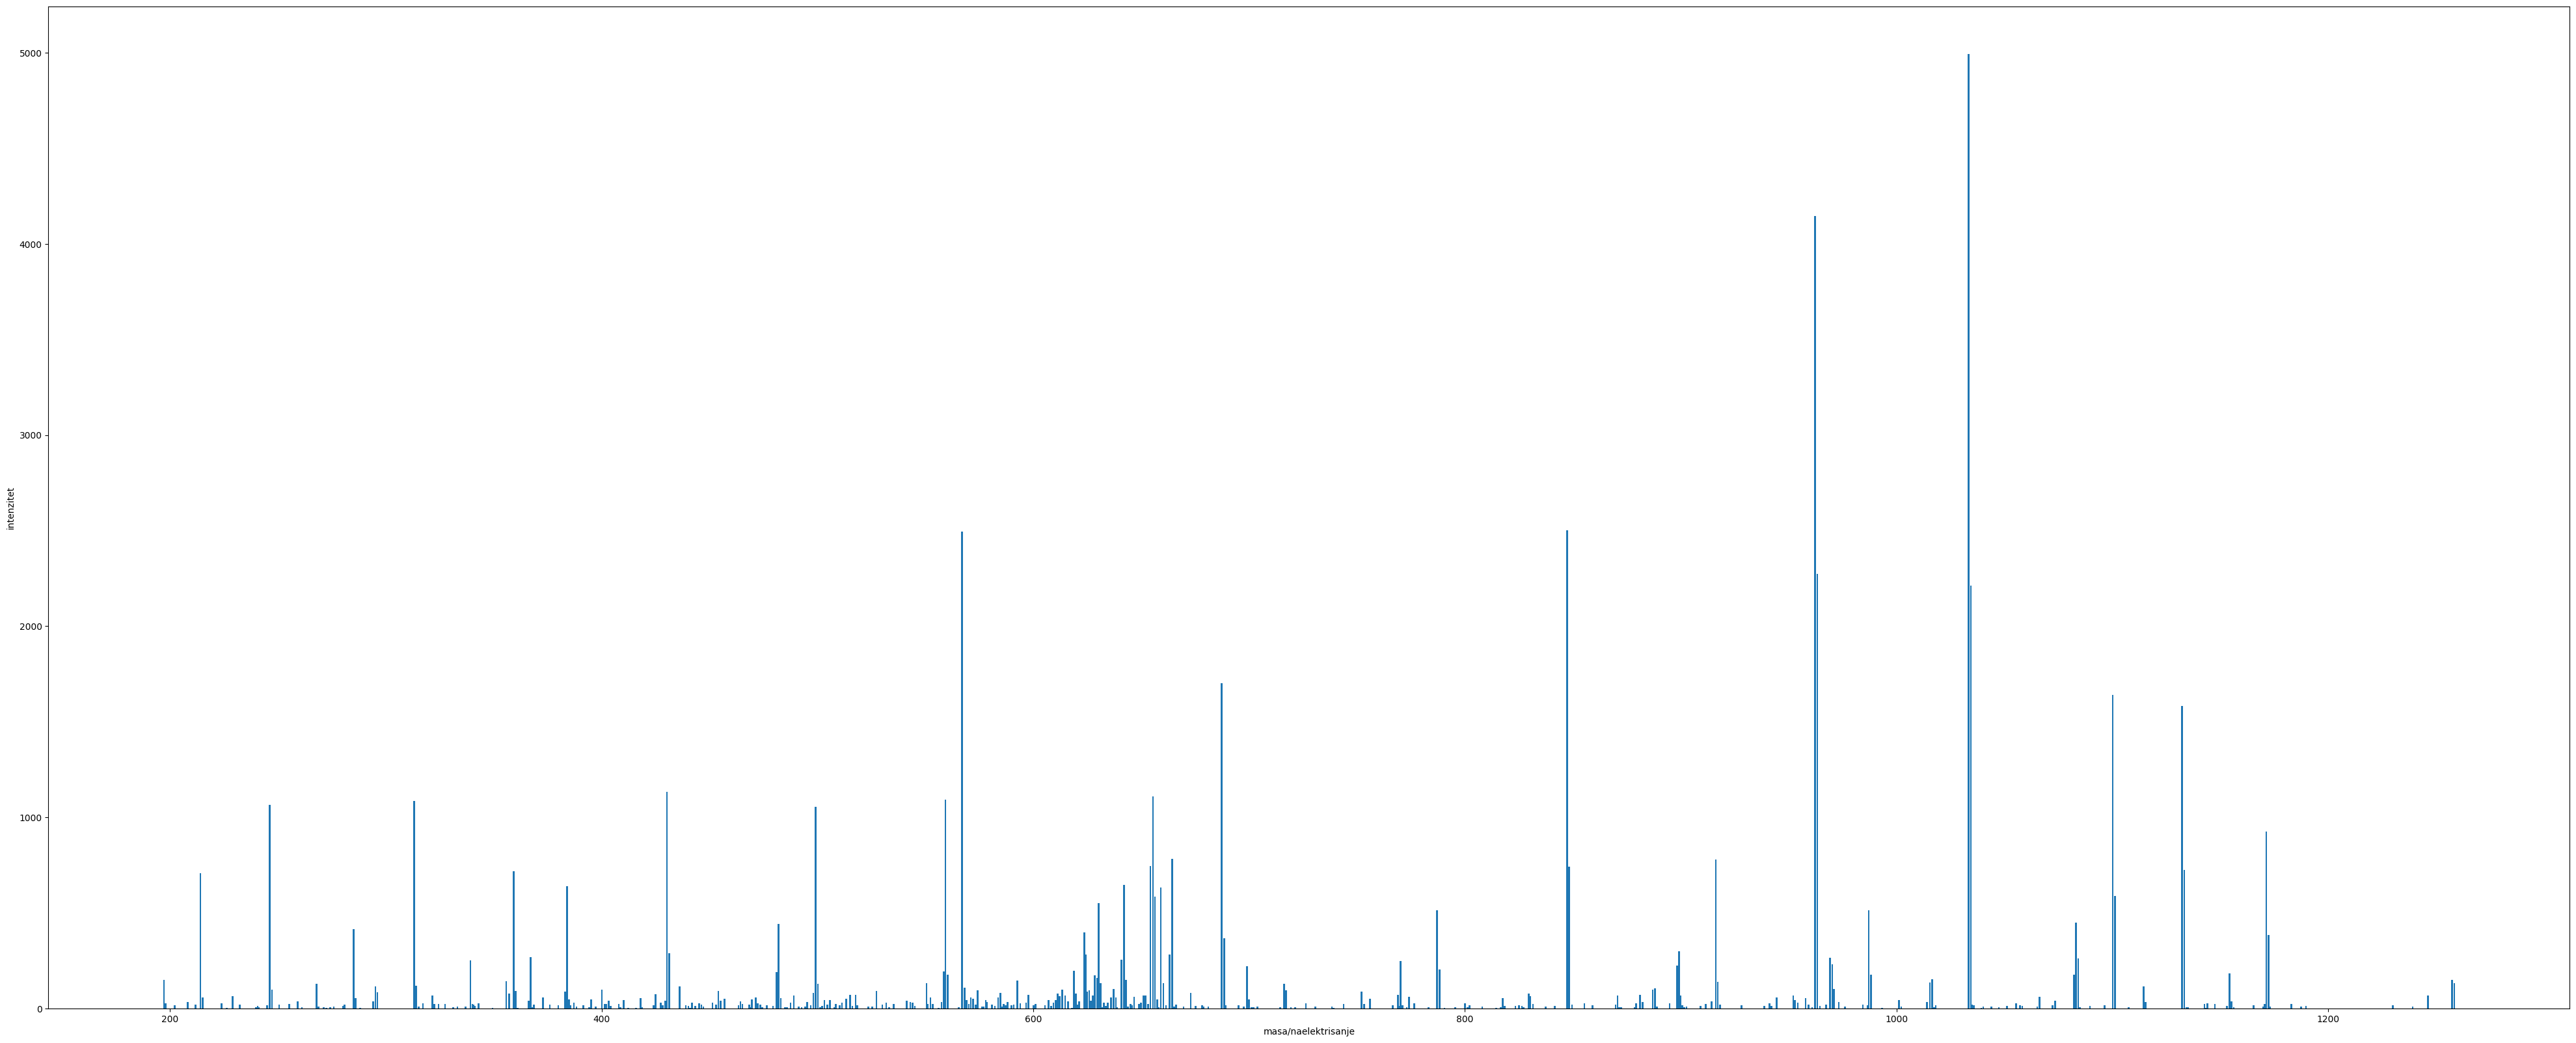

In [5]:
prikaz_primera_masenog_spektra()

<h2 align='center'> Декодирање идеалног спектра </h2>

Како би се лакше приступили интерпретацији масеног спектра, погодно је на самом почетку поједноставити његову репрезентацију, решавати проблем интерпретације масеног спектра, а затим га постепено усложњавати. Ради креирања такве једноставне репрезентације може се занемарити податак о интензитетима и подразумевати да је апсолутна вредност налекетрисања увек једнака један. На овај начин прилагођен масени спектар као податак садржи само масе фрагмената пептида. Додатно поједностављивање постиже се претпоставком о начину фрагментације такве да све копије једног пептида производе све могуће комбинације његових префикса и суфикса. Овако дефинисан масени спектар назива се идеалним и његовом употребом омогућено је лакше решавање  проблема секвенцирања пептида. 

 <figure>
  <img src="../slike/idealna-fragmentacija.png" style="float:center" width="1000">
  <figcaption style="text-align: center"> Идеална фрагментација пептида </figcaption>
</figure> 

Додатан корак поједностављивања масеног спектра постиже се употребом целобројних маса амино киселина уместо њихових реалних вредности. Приказана табела представља разлике између вредности различитих врста маса амино киселина:

<ol>
    <li> моноизотопских: маса узима у обзир само најчешћи изотоп хемијских елемената
    <li> средњих: маса узима у обзир све могуће изотопе хемијских елемената, рачунајући њихову средњу масу
    <li> целобројних 
</ol>

Са напредовањем технологија делова масених спектрометара, који повећеавају њихову прецизност, целобројне масе нису практичне за употребу јер у том случају одређене амино киселине имају једнаке масе (I/L и K/Q).   

In [6]:
pd.concat([
    pd.DataFrame.from_dict(mase, orient='index', columns=[oznaka]) for oznaka, mase in mase_amino_kiselina.items()
], axis=1)

,celobrojne,monoizotopske,srednje
G,57,57.02146,57.0519
A,71,71.03711,71.0788
S,87,87.03203,87.0782
P,97,97.05276,97.1167
V,99,99.06841,99.1326
T,101,101.04768,101.1051
C,103,103.00919,103.1388
I,113,113.08406,113.1594
L,113,113.08406,113.1594
N,114,114.04293,114.1038


Са овако дефинисаним масеним спектром, могуће је дефинисати први изазов који треба превазићи на путу до алгоритма за секвенцирање пептида: на основу масеног спектра одредити пептид који је тај масени спектар произвео. Да би се уочио начин на који је је овај проблем могуће решити од користи је погледати како изгледа идеалан спектар одређеног пептида.

Претходно уведеним класама Пептид и МасениСпектар се додају методе које омогућавају рад са идеалним спектром.
Класа Пептид се допуњава информацијом о масама свих могућих префикса и суфикса, ради представаљања идеалног спектра за тај пептид. 

In [7]:
# Библиотека која омогућавају увид у информације о живим објектима током изврашавања
import inspect

In [8]:
# Приказ тренутне верзије методе класе
print(inspect.getsource(Peptid.__init__))

    def __init__(self, peptid):
        """
        Пептид је представљен ниском амино киселина у стринговној једнословној репрезентацији.
        """
        self.peptid = peptid



In [9]:
# Дефинисање нове методе класе
def kreiraj_idealan_spektar(self):
    return MaseniSpektar(self.mase_prefiksa + self.mase_sufiksa)

In [10]:
# Дефинисанње нових атрибута класе
def __init__(self, peptid):
    # Пептид је представљен ниском амино киселина у стринговној једнословној репрезентацији
    self.peptid = peptid

    # Масе префикса и суфикса пептидне секвенце
    self.mase_prefiksa = list(np.cumsum([0] + [mase_amino_kiselina["celobrojne"][self.peptid[i]] for i in range(len(self.peptid))]))
    self.mase_sufiksa = list(np.cumsum([0] + [mase_amino_kiselina["celobrojne"][self.peptid[-(i+1)]] for i in range(len(self.peptid))]))

    # Идеалан спектар представљен листом целобројних маса
    self.idealan_spektar = self.kreiraj_idealan_spektar() 

In [11]:
# Замена и додавање метода класи
Peptid.kreiraj_idealan_spektar = kreiraj_idealan_spektar
Peptid.__init__ = __init__

На сликама су приказани узастопни префикси и узастопни суфикси пептида "REDCA". Из приказаног примера се може уочити да се масе узастопних префикса идеалног спектра разликују за масу једне амино киселине (чија маса је приказана на стрелици која повезује два суседа), које спојене одговарају почетној секвенци амино киселина пептида. Иста правилност важи и за суфиксе. За оба случаја постоји код који управо на основу масених вредности реконструише пептид.


<img src="../slike/prefiksi.png"/>
<img src="../slike/sufiksi.png"/>

In [12]:
p = Peptid("REDCA")

In [13]:
mase_prefiksa = p.mase_prefiksa
display("".join([celobrojna_masa_u_amino_kiselinu[mase_prefiksa[i] - mase_prefiksa[i-1]] for i in range(1, len(mase_prefiksa))]))

'REDCA'

In [14]:
mase_sufiksa = p.mase_sufiksa
display("".join([celobrojna_masa_u_amino_kiselinu[mase_sufiksa[i] - mase_sufiksa[i-1]] for i in range(1, len(mase_sufiksa))]))

'ACDER'

In [15]:
stampanje_za_grafike = """
peptid = Peptid("REDCA")
mase_prefiksa = peptid.mase_prefiksa
mase_sufiksa = peptid.mase_sufiksa

for i in range(0, len(mase_prefiksa)-1):
    print(peptid.peptid[:i], mase_prefiksa[i], mase_sufiksa[len(mase_prefiksa)-1-i])
"""

Претходно опажање указује да би се одвајањем маса префикса и маса суфикса добио једнозначан метод генерисања секвенце. Међутим, у пракси је то прва компликација при интерпретацији масеног спектра. Уместо тога може се уочити да, уколико се две масе разликују за масу једне амино киселине, онда оне вероватно одговарају масама два узастопна префикса или масама два узастопна суфикса. На слици су приказани суседни префикси и разлике једног од њих са свим суфиксима, као приказ претходно описаног односа.

<img src="../slike/redca-spajanje-prefiksa-sa-sufiksima.drawio.png"> </img>

То би значило да уколико низ маса спектра може бити сортиран од масе 0 до највеће масе спектра, тако да се оне смењују са разликом од масе једне амино киселине међусобно, потенцијално се добија декодиран спектар. Овај проблем одговара проблему проналаска путање од извора до понора у графу. Тај граф је ацикличан јер веза између две масе постоји само у једном смеру, од веће ка мањој, па не постоје повратне гране. Овај проблем је могуће решити већ постојећим алоритмом.

У графовском приступу, масе спектра у растућем поретку престављају масе тополошки сортираних чворова. Прва у низу маса одговара маси 0 (извор), док последња одговара највећој маси спектра (понор). Два чвора су повезана ивицом уколико је разлика маса која њима одговарају једнака маси неке амино киселине.

In [16]:
# Функције исцртавањa графова који одогварају масеним спектрима коришћењем BokehJS библиотеке
from iscrtavanje_grafa import nacrtaj_graf

Loading BokehJS ...

In [17]:
class Graf:
    """Структура за репрезентацју масеног спектра."""
    
    def __init__(self, cvorovi, amino_kiseline):
        
        # Чворови графа одговарају масама спектра    
        self.cvorovi = sorted(cvorovi)
        
        # Ивице графа повезују два чвора уколико је разлика одговарајућих маса једнака маси неке од амино киселина
        self.ivice = dict([])
        
        for i in range(len(self.cvorovi)):
            s_i = self.cvorovi[i]
            self.ivice[s_i] = []
            
            for j in range(len(self.cvorovi)):
                s_j = self.cvorovi[j]
                if (s_j - s_i) in amino_kiseline:
                    self.ivice[s_i].append((s_j, celobrojna_masa_u_amino_kiselinu[s_j - s_i]))
    
    def nacrtaj(self, putanja=None):        
        # Позива се функција из учитаног модула 
        nacrtaj_graf(self.cvorovi, self.ivice, putanja)
        
    def __str__(self): 
        
        # Испис свих чворова и њима одговарајућих суседа, који се по маси разликују за масу једне амино киселине.
        for cvor, susedi in self.ivice.items():
            for sused in susedi:
                print(f"{cvor}->{sused[0]}: {sused[1]}")

In [18]:
# Приказ тренутне верзије методе класе
print(inspect.getsource(MaseniSpektar.__init__))

    def __init__(self, spektar):
        # Спектар је представљен сортираном листом целобројних маса
        self.spektar = sorted(set([0] + spektar))
        self.roditeljska_masa = max(spektar)        



In [19]:
# Дефинисанње нових атрибута класе
def __init__(self, spektar):
    # Спектар је представљен сортираном листом целобројних маса
    self.spektar = sorted(set([0] + spektar))
    self.roditeljska_masa = max(spektar)        

    # Додавање графа за репрезентацију спектра
    self.graf = Graf(self.spektar, amino_kiseline=celobrojna_masa_u_amino_kiselinu)    
    
def nacrtaj(self, putanja=None):
    self.graf.nacrtaj(putanja)

In [20]:
# Замена и додавање метода класи
MaseniSpektar.__init__ = __init__
MaseniSpektar.nacrtaj = nacrtaj

На приказаном графу пептида који је коришћен у претходним примера илустрације односа између маса суседних префикса и суфикса, поново се потврђује описани однос. Могу се видети и амино киселине које такав однос граде.

In [21]:
Peptid("REDCA").idealan_spektar.nacrtaj()

За дати спектар кажемо да одређени пептид објашњава тај спектар уколико идеални спектар пептида одговара том спектру.

In [22]:
# Дефинисање нове методе класе
def objasnjava_spektar(self, maseni_spektar, ispis=False):
    objasnjava = self.idealan_spektar.spektar == maseni_spektar.spektar
        
    if ispis:
        if objasnjava:
            print(f"Пептид {self.peptid} објашњава спектар {maseni_spektar.spektar}")
        else:
            print(f"Пептид {self.peptid} НЕ објашњава спектар {maseni_spektar.spektar}")
    else:
        return objasnjava

In [23]:
# Замена и додавање метода класи
Peptid.objasnjava_spektar = objasnjava_spektar

In [24]:
Peptid("REDCA").objasnjava_spektar(Peptid("REDCA").idealan_spektar, ispis=True)

Пептид REDCA објашњава спектар [0, 71, 156, 174, 285, 289, 400, 418, 503, 574]


Конструисан је граф и дефинисан је проблем. Сада је потребно дефинисати његово решење.
Познати алгоритам претраге кретањем у дубину је алгоритам који ћемо користити како бисмо пронашли путању од извора до понора у представљеној репрезентацији масеног спектра ацикличним графом.
Обилазак графа почиње у изабраном изворном чвору, наставља се обилажењем једног по једног суседа, обилазећи сваки од њих што је даље могуће у потрази за изабраним чвором понора. Када чвор нема више суседа који се могу обићи, а пут није пронађен, обилазе се наредни суседи. Уколико се не стигне до понора, већ идењем уназад до извора, тада не постоји путања која спаја та два чвора. 
Пренето на декодирање идеалног спектра, уколико не постоји путања онда није могуће реконструисати секвенцу амино киселина која је произвела дати спектар.

In [25]:
# Дефинисање нове методе класе
def dekodiranje_idealnog_spektra(self):
    # Проналази путању од првог до последњег чвора
    # Секвенца одговара секвенци амино киселина пептида који је произвео спектар

    izvor = self.graf.cvorovi[0]
    ponor = self.graf.cvorovi[-1]

    poseceni_cvorovi = [izvor]
    putanja = [izvor]
    poslednji_posecen_cvor = izvor
    peptid = ""

    while True:
        # Ако чвор одговара последњем чвору и највећој маси спектра, секвенца амино киселина је креирана
        if putanja[-1] == ponor:
            return Peptid(peptid), putanja

        pronadjen_sused = False
        # Проласком кроз суседе последњег посећеног чвора, уколико такви постоје, врши се проширивање путања
        for sused, amino_kiselina in self.graf.ivice[poslednji_posecen_cvor]:
            if sused not in poseceni_cvorovi:
                pronadjen_sused = True

                poseceni_cvorovi += [sused]
                putanja += [sused]
                poslednji_posecen_cvor = putanja[-1]
                peptid += amino_kiselina

                break

        # Уколико чвор нема непосећених суседа, иде се корак уназад елиминацијом тог чвора
        if not pronadjen_sused:
            putanja.pop()
            poslednji_posecen_cvor = putanja[-1]
            peptid = peptid[:-1]

        # Ако се у неком кораку стигло до почетног чвора, онда не постоји одговарајући пут и резултат је празна секвенца
        if putanja[-1] == izvor:
            return Peptid(peptid), putanja
        

# Дефинисање нове методе класе
def pronadji_sve_putanje(self, izvor, ponor):
    # Проналажење свих путања са почетком и крајем у наведеним чворовима графа
    
    if izvor == ponor:
        return [(Peptid(""), [])]

    putevi = []
    for sused, amino_kiselina in self.graf.ivice[izvor]:
        putevi_od_suseda = self.pronadji_sve_putanje(sused, ponor)
        putevi += [(Peptid(amino_kiselina + str(x[0])), [sused] + x[1]) for x in putevi_od_suseda]

    return putevi
    
# Дефинисање нове методе класе
def svi_peptidi_kandidati(self):
    # Проналаском свих могућих путања од најмање до највеће масе добијају се сви пептиди кандидати
    
    return [(x[0], [0] + x[1]) for x in self.pronadji_sve_putanje(0, self.roditeljska_masa)]

In [26]:
# Замена и додавање метода класи
MaseniSpektar.dekodiranje_idealnog_spektra = dekodiranje_idealnog_spektra
MaseniSpektar.pronadji_sve_putanje = pronadji_sve_putanje
MaseniSpektar.svi_peptidi_kandidati = svi_peptidi_kandidati

In [27]:
peptid = Peptid("REDCA")
print(peptid.idealan_spektar.dekodiranje_idealnog_spektra()[0])

ACDER


In [28]:
peptid = Peptid("".join([random.choice(list(mase_amino_kiselina["celobrojne"].keys())) for i in range(7)]))
print(peptid)
print(peptid.idealan_spektar.dekodiranje_idealnog_spektra()[0])

PNMEFDD
PNMEFDD


In [29]:
maseni_spektar = MaseniSpektar([0, 97, 115, 226, 228, 323, 329, 424, 426, 537, 555, 652])
peptid = maseni_spektar.dekodiranje_idealnog_spektra()

In [30]:
kandidat = [peptid for peptid in maseni_spektar.svi_peptidi_kandidati() if not peptid[0].objasnjava_spektar(maseni_spektar)][0]
maseni_spektar.nacrtaj(kandidat)

In [31]:
kandidat[0].objasnjava_spektar(maseni_spektar, ispis=True)

Пептид PEPTMP НЕ објашњава спектар [0, 97, 115, 226, 228, 323, 329, 424, 426, 537, 555, 652]


На претходном примеру је приказана путања која одговара пептидној секвенци која спаја масу 0 са највећом масом спектра. Међутим, уколико се изврши провера да ли тај пептид објашњава дати спектар, резултат је другачији него што се очекује.
Управо због тога што нисмо могли раздвојити префиксне од суфиксних маса, свака од ових маса може бити интерпретирана као нешто што није, префиксна као суфиксна али и обратно. Стога, није свака пронађена путања, путања која у потпуности може да објасни спектар.

<img src="../slike/homeometricni-peptidi.png"/>

Оваква колизија различитих типова маса и њихово мешање у интерпретацији је познато као проблем анти-симетричних путања. Сваки чвор који одговара одређеној маси има чвор близанац који одговара маси која стоји насупрот ње, чинећи их комплементарним у односу на пептид. Оно што се дешава код пептида који не објашњавају спектар је да путања пролази кроз оба елемената пара, креирајући решење које није компатибилно са осталим информацијама присутним у спектру. Решење овог проблема се крије управо у томе да путања мора да прође крож тачно један од ових чворова. Овај проблем је специјалан случај једног општег проблема у ком је дата колекција парова забрањених чворова графа, а путања графа се назива анти-симетричном уколико садржи тачно један чвор за сваки забрањен пар. У оригиналном облику, проблем је НП-тежак, међутим управо због услова комплементарности маса које се сабирају на масу елог пептида, постоји полиномијалан алгоритам који решава овај специјалан случај.

За решавање овох проблема у пракси постоји неколико приступа, међутим с озиром на поједностављени случај који имамо пред собом, довољно је изменити код тако да врши додатну проверу услова објашњавања. Више није могуће пронаћи генерисати само једну путању, већ је потребно искористити све кандидате пептиде да би се међу њима пронашао онај који испуњава претходно уведени услов. 

In [32]:
def dekodiranje_idealnog_spektra(self, stampaj_kandidate=False):
    # Проналази секвенцу пептида који је генерисао дати масени спектар
    
    peptidi_kandidati = self.svi_peptidi_kandidati()
    for peptid, _ in peptidi_kandidati:

        if stampaj_kandidate:
            print(f"Пептид кандидат: {peptid}")

        if peptid.objasnjava_spektar(self):   
            return peptid

    return None

In [33]:
MaseniSpektar.dekodiranje_idealnog_spektra = dekodiranje_idealnog_spektra

In [34]:
maseni_spektar.dekodiranje_idealnog_spektra()

PEPTLD

Иако овај алгоритам решава проблем декодирања идеалног спектра, обилазак свих путања у графу може бити временски захтевно, с обзиром да број таквих путања може бити експоненцијалан броју маса у спектру.

In [35]:
peptid = Peptid("ACSAGERDTFGGDLAAPGAGF")
maseni_spektar = peptid.idealan_spektar

In [36]:
maseni_spektar.graf.nacrtaj()

In [37]:
start_time = time.time()
print(f"Пептид добијен декодирањем идеалног масеног спектра: {maseni_spektar.dekodiranje_idealnog_spektra()}")
end_time = time.time()
print(f"Време извршавања процеса декодирања: {end_time-start_time}")

Пептид добијен декодирањем идеалног масеног спектра: ACSAGERDTFGGDLAAPGAGF
Време извршавања процеса декодирања: 4.6454174518585205


<pre>
Branch and Bound implementacija => nema potrebe da ispitujemo sve putanje :) 
</pre>

In [38]:
def delimicno_objasnjava_spektar(self, maseni_spektar):
    # Проверава да ли генерисани пептид потенцијално представља део пептида који у потпуности објашњава спектар. 
    
    return len([x for x in self.mase_prefiksa if x not in maseni_spektar.spektar]) == 0

In [39]:
Peptid.delimicno_objasnjava_spektar = delimicno_objasnjava_spektar

In [40]:
def dekodiranje_idealnog_spektra_sa_odsecanjem(self, stampaj_kandidate=False):
    # Користиће методу гранања и одсецања, проналази пептид који одговара генерисаном спектру.
    
    izvor = 0
    ponor = self.roditeljska_masa

    putanja = [izvor]
    poslednji_posecen_cvor = izvor
    peptid = "" 
    redni_broj_suseda = {cvor: 0 for cvor in self.graf.cvorovi}

    while True:
        if poslednji_posecen_cvor == ponor:
            if stampaj_kandidate:
                print(f"Пептид кандидат: {peptid}")

            if Peptid(peptid).objasnjava_spektar(self):   
                return Peptid(peptid), putanja

        # Уколико тренутни пептид није усклађен са спектром, врши се одсецање, 
        # што значи да се тренутни пептид не проширује даље
        if not Peptid(peptid).delimicno_objasnjava_spektar(self):
            putanja.pop()
            peptid = peptid[:-1]
            try:
                redni_broj_suseda[poslednji_posecen_cvor] = 0 
                poslednji_posecen_cvor = putanja[-1]
                redni_broj_suseda[poslednji_posecen_cvor] += 1
            except:
                return None

        # Уколико су сви суседи тренутног чвора посећени, враћа се корак уназад
        if redni_broj_suseda[poslednji_posecen_cvor] >= len(self.graf.ivice[poslednji_posecen_cvor]): 
            putanja.pop()
            peptid = peptid[:-1]
            try:
                redni_broj_suseda[poslednji_posecen_cvor] = 0 
                poslednji_posecen_cvor = putanja[-1]
                redni_broj_suseda[poslednji_posecen_cvor] += 1
            except:
                return None
        # Уколико нису посећени сви суседи тренутног чвора, наставља се ширење пептида корипћењем наредног суседа
        else:
            sused_masa, sused_amino_kiselina = self.graf.ivice[poslednji_posecen_cvor][redni_broj_suseda[poslednji_posecen_cvor]]
            putanja.append(sused_masa)
            peptid += sused_amino_kiselina
            poslednji_posecen_cvor = sused_masa

In [41]:
MaseniSpektar.dekodiranje_idealnog_spektra_sa_odsecanjem = dekodiranje_idealnog_spektra_sa_odsecanjem

In [42]:
start_time = time.time()
print(f"Пептид добијен декодирањем идеалног масеног спектра: {maseni_spektar.dekodiranje_idealnog_spektra_sa_odsecanjem()[0]}")
end_time = time.time()
print(f"Време извршавања процеса декодирања: {end_time-start_time}")

Пептид добијен декодирањем идеалног масеног спектра: ACSAGERDTFGGDLAAPGAGF
Време извршавања процеса декодирања: 0.002999544143676758


Неколико примера декодирања спектра приказаних графом. 

In [43]:
def prikazi_dekodiranje_spektra(lista_masa):
    maseni_spektar = MaseniSpektar(lista_masa)
    peptid = MaseniSpektar(lista_masa).dekodiranje_idealnog_spektra_sa_odsecanjem()
    
    maseni_spektar.graf.nacrtaj(peptid)
    peptidi_kandidati = maseni_spektar.svi_peptidi_kandidati()
    
    if len(peptidi_kandidati) < 10:
        print(f"Сви пептиди кандидати: { [peptid for peptid, _ in maseni_spektar.svi_peptidi_kandidati()]}")
    else:
        print(f"Пептида кандидата има {len(peptidi_kandidati)}")
        
    print(f"Пептид добијен декодирањем: {peptid[0] if peptid is not None else ''}")

In [44]:
prikazi_dekodiranje_spektra([0, 113, 137, 184, 268, 297, 381, 425, 496, 581, 624, 695, 752, 832, 889, 988, 1045, 1102, 1160, 1215, 1217, 1314, 1373, 1401, 1460, 1557, 1559, 1614, 1672, 1729, 1786, 1885, 1942, 2022, 2079, 2150, 2193, 2278, 2349, 2393, 2477, 2506, 2590, 2637, 2661, 2774])

Пептида кандидата има 10682
Пептид добијен декодирањем: LALQRNGHVGGLVSRGDGVGHAQDLMH


In [45]:
prikazi_dekodiranje_spektra([0, 156, 285, 400, 503, 574, 418, 289, 174, 41])

Сви пептиди кандидати: [REDCA]
Пептид добијен декодирањем: 


In [46]:
prikazi_dekodiranje_spektra([0, 156, 285, 400, 503, 574, 418, 289, 174, 71])

Сви пептиди кандидати: [ACDER, REDCA]
Пептид добијен декодирањем: ACDER


In [47]:
prikazi_dekodiranje_spektra([0, 57, 114, 128, 215, 229, 316, 330, 387, 444])

Пептида кандидата има 32
Пептид добијен декодирањем: GGTTAG


In [48]:
prikazi_dekodiranje_spektra([0, 71, 103, 113, 142, 156, 170, 174, 250, 285, 289, 400, 403, 413, 432, 503, 574])

Сви пептиди кандидати: [AVDDCA, AVDFAA, LGDDCA, LGDFAA, REDCA, REFAA]
Пептид добијен декодирањем: 
